In [13]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [14]:
img=image.load_img("Training/Resnet50/resnet5.png")

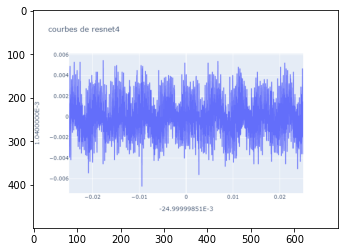

In [15]:
plt.imshow(img)

In [16]:
cv2.imread("Training/Resnet50/resnet5.png").shape

(500, 700, 3)

In [17]:
train = ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [18]:
train_dataset=train.flow_from_directory('Training/',target_size=(200,200),batch_size=3,class_mode='categorical')
validation_dataset=validation.flow_from_directory('Validation/',target_size=(200,200),batch_size=3,class_mode='categorical')

Found 48 images belonging to 3 classes.
Found 21 images belonging to 3 classes.


In [19]:
train_dataset.class_indices

{'MobileNet': 0, 'Person Detection': 1, 'Resnet50': 2}

In [20]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [21]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 tf.keras.layers.Dense(3,activation='sigmoid')
                                 ])

In [22]:
model.compile(loss='categorical_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [23]:
model_fit=model.fit(train_dataset,steps_per_epoch=5,epochs=20 ,validation_data=validation_dataset)

Epoch 1/20
5/5 [==============================] - 4s 740ms/step - loss: 16.6309 - accuracy: 0.4667 - val_loss: 2.7847 - val_accuracy: 0.3810
Epoch 2/20
5/5 [==============================] - 3s 703ms/step - loss: 3.0243 - accuracy: 0.4000 - val_loss: 1.4750 - val_accuracy: 0.3333
Epoch 3/20
5/5 [==============================] - 4s 714ms/step - loss: 1.1520 - accuracy: 0.6000 - val_loss: 1.2454 - val_accuracy: 0.4762
Epoch 4/20
5/5 [==============================] - 3s 660ms/step - loss: 0.9611 - accuracy: 0.7333 - val_loss: 1.2623 - val_accuracy: 0.4762
Epoch 5/20
5/5 [==============================] - 3s 684ms/step - loss: 0.8379 - accuracy: 0.6667 - val_loss: 1.3310 - val_accuracy: 0.3333
Epoch 6/20
5/5 [==============================] - 3s 676ms/step - loss: 0.8108 - accuracy: 0.5333 - val_loss: 1.2611 - val_accuracy: 0.1905
Epoch 7/20
5/5 [==============================] - 4s 746ms/step - loss: 0.8069 - accuracy: 0.5333 - val_loss: 1.4186 - val_accuracy: 0.5238
Epoch 8/20
5/5 [===

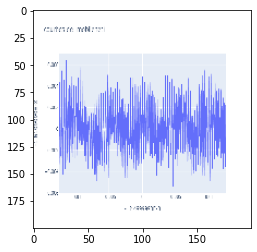

1/1 [==============================] - 0s 26ms/step
img1.png
[0]
This is MobileNet architecture


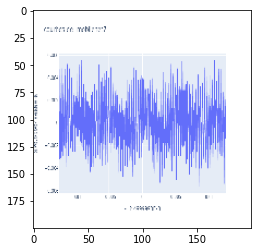

1/1 [==============================] - 0s 25ms/step
img2.png
[0]
This is MobileNet architecture


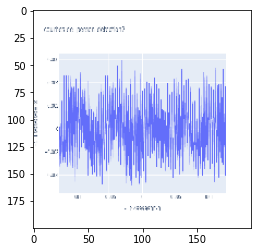

1/1 [==============================] - 0s 28ms/step
img3.png
[1]
This person detection model


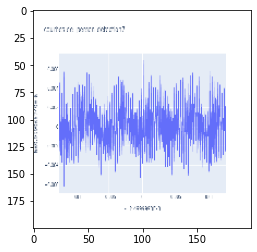

1/1 [==============================] - 0s 28ms/step
img4.png
[1]
This person detection model


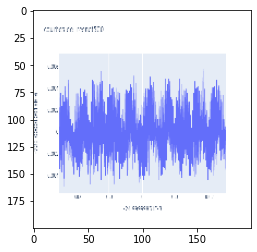

1/1 [==============================] - 0s 25ms/step
img5.png
[2]
This is Resnet50 architecture 


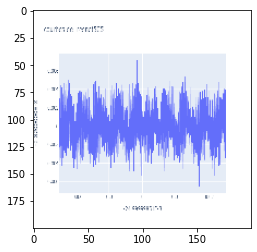

1/1 [==============================] - 0s 28ms/step
img6.png
[2]
This is Resnet50 architecture 


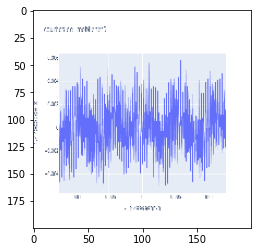

1/1 [==============================] - 0s 28ms/step
img7.png
[0]
This is MobileNet architecture


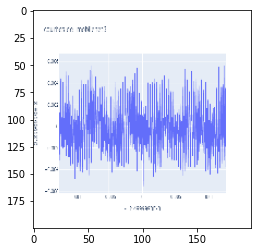

1/1 [==============================] - 0s 31ms/step
img8.png
[0]
This is MobileNet architecture


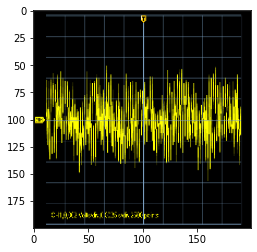

1/1 [==============================] - 0s 25ms/step
img9.png
[1]
This person detection model


In [38]:
dir_path='Testing'
for i in os.listdir(dir_path ):
    
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))

    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    
    val=np.array(tf.math.argmax(model.predict(images),axis=-1,output_type=tf.dtypes.int64,))
    
    print (i)
    print (val)
     
    if (val == 2 ) :
        
        print ("This is Resnet50 architecture ")
    
    elif (val == 0 ):
        print("This is MobileNet architecture")
    elif (val == 1 ) :
        print("This person detection model")
        
    else :
        print("Autre architecture")
    
    